This code focuses on exploring the Mackey-Glass model of respiration and how the time delay between gas exchange in the lungs affects CO2 monitoring neurons in the brain. 

In [5]:
def dde_solve(dde, statevar, delayedvars, history, tmax, timestep):
    # Check validity of delays.
    if min(delayedvars.values()) < 0:
        raise ValueError("This function will not work with negative delays. "
            "Consider consulting a fortune teller instead.")
    if any(val<= timestep for val in delayedvars.values()):
        raise ValueError("Time step should be smaller than delay.")

    # Set up variables and delays.

    delayedvars = delayedvars.items()
    dde = dde.subs({v: statevar for v, delay in delayedvars if delay == 0})
    delayedvars = [(v, delay) for v, delay in delayedvars if delay != 0]
    allvars = [str(statevar)] + [str(v) for v, delay in delayedvars]
    delays = [delay for v, delay in delayedvars]

    # Set up fast functions.
    dde_func = fast_float(dde, *allvars)
    history_func = fast_float(history, "t")

    # Adjust the timestep if necessary
    mindelay = min(delays) if delays else timestep
    timestepcorrectionfactor = ceil(timestep / mindelay)
    timestep /= timestepcorrectionfactor

    # A function to perform history lookups.
    def lookup(t):
        """Does a history lookup at each delay from t, stores result in allvars[1:]"""
        for i, delay in enumerate(delays):
            if t - delay <= 0:
                allvars[i+1] = history_func(t - delay)
            else:
                r = (t - delay) / timestep
                n = floor(r)
                r -= n
                allvars[i+1] = result[n]*(1 - r) + result[n + 1]*r

    # Set up for the first iteration.
    result = [history_func(0)]
    lookup(0)
    for t in sxrange(0, tmax - timestep, timestep):
        # Compute k1. Note history lookup has already been done.
        allvars[0] = result[-1]
        k1 = dde_func(*allvars)
        # Compute k2.
        lookup(t + timestep/2)
        allvars[0] += timestep/2 * k1
        k2 = dde_func(*allvars)
        # Compute k3. Note history lookup has already been done.
        allvars[0] = result[-1] + timestep/2 * k2
        k3 = dde_func(*allvars)
        # Compute k4.
        lookup(t + timestep)
        allvars[0] = result[-1] + timestep * k3
        k4 = dde_func(*allvars)
        # Finally, compute the RK4 weighted average.
        result.append(result[-1] + (k1 + 2*k2 + 2*k3 + k4)/6 * timestep)
    return result[::timestepcorrectionfactor]


In [6]:
#2 
menu={"Ice cream":4.95,"cookies":2,"Candy":1}
menu["cookies"]

2

In [7]:
#3
var("X,x_t")
L=6
Vmax=80
a=0.2
n=5
h=400
r=0.2
sol=dde_solve(L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x,x,{x_t:0.2},history=0,tmax=100,timestep=0.1)
d=sol
show(d)

[0.0,
 0.600000000000000,
 1.20000000000000,
 1.79989698697467,
 2.39255578417688,
 2.90058982739181,
 3.03440424685368,
 2.52653574998996,
 1.86020988283614,
 1.65048711481737,
 1.92431916393925,
 2.38664205724829,
 2.79988624250598,
 2.90408401805068,
 2.50841826466897,
 1.96906417358237,
 1.78105672465631,
 2.00640783707915,
 2.41324558825583,
 2.77013954048765,
 2.83148519411304,
 2.46263426764845,
 1.99587720173328,
 1.85002722061412,
 2.07035103188218,
 2.44800352665446,
 2.76138601992621,
 2.77765526245162,
 2.41196703723938,
 1.99793667876404,
 1.89695742215777,
 2.12611945457181,
 2.48520774215027,
 2.75986285845629,
 2.73025325525751,
 2.36024260941819,
 1.99130334210952,
 1.93512109158620,
 2.17800315491540,
 2.52270854352660,
 2.75976081991685,
 2.68410542868800,
 2.30880537624076,
 1.98255124371017,
 1.97029488207216,
 2.22799783314777,
 2.55930038372949,
 2.75798038683330,
 2.63682604128011,
 2.25859485601577,
 1.97500702797414,
 2.00531112901863,
 2.27700871431841,
 2.59406899082830,
 2.75261112788156,
 2.58740086643212,
 2.21050871001826,
 1.97057820946536,
 2.04160157390976,
 2.32535686590501,
 2.62619187013409,
 2.74238879459737,
 2.53561247061249,
 2.16544655652759,
 1.97042105214745,
 2.07983787573426,
 2.37301983050129,
 2.65487375147455,
 2.72648150945773,
 2.48175982218555,
 2.12428467760912,
 1.97522480150346,
 2.12023917234479,
 2.41975586467062,
 2.67933104929433,
 2.70440387611299,
 2.42649465946031,
 2.08783945342609,
 1.98534979105395,
 2.16273796430331,
 2.46517207853795,
 2.69879871387541,
 2.67598328265266,
 2.37070811834696,
 2.05683417415811,
 2.00090468713509,
 2.20707829973394,
 2.50876446784247,
 2.71255056191034,
 2.64134479552491,
 2.31544065303876,
 2.03187225473833,
 2.02179698015663,
 2.25287782553501,
 2.54994428022367,
 2.71992933663406,
 2.60089763500419,
 2.26180465927284,
 2.01341696995329,
 2.04777132979462,
 2.29966804285337,
 2.58805844521539,
 2.72038348902548,
 2.55531443159277,
 2.21091702779016,
 2.00177774200812,
 2.07844207836318,
 2.34691964960780,
 2.62240815779648,
 2.71350707880126,
 2.50549977335342,
 2.16384245635741,
 1.99710340837125,
 2.11332232171961,
 2.39405689374591,
 2.65226801706149,
 2.69907865007780,
 2.45254824493993,
 2.12154894105826,
 1.99938275921544,
 2.15184999325988,
 2.44046420318896,
 2.67690772344345,
 2.67709480465747,
 2.39769420183323,
 2.08487545939114,
 2.00845195721866,
 2.19341058789258,
 2.48548857671602,
 2.69561830141310,
 2.64779433257730,
 2.34225619323068,
 2.05451004977146,
 2.02400776114718,
 2.23735590416354,
 2.52844120025151,
 2.70774419695014,
 2.61166917223744,
 2.28757916506157,
 2.03097577027519,
 2.04562513811550,
 2.28301812116390,
 2.56860098544238,
 2.71272106513788,
 2.56945954537942,
 2.23497809443671,
 2.01462274916485,
 2.07277778896364,
 2.32971857030037,
 2.60522151836413,
 2.71011711096705,
 2.52213259871221,
 2.18568726777132,
 2.00562586209611,
 2.10486007228505,
 2.37677095922773,
 2.63754202969271,
 2.69967431727692,
 2.47084629012397,
 2.14081901148536,
 2.00398833515947,
 2.14120874469177,
 2.42347976115139,
 2.66480294117791,
 2.68134522736253,
 2.41690204029996,
 2.10133379669561,
 2.00955135703142,
 2.18112298873817,
 2.46913573016088,
 2.68626698851051,
 2.65532096431342,
 2.36169022461871,
 2.06802106271850,
 2.02200905198066,
 2.22388143154777,
 2.51301134153625,
 2.70124697837806,
 2.62204656771203,
 2.30663236985414,
 2.04148838348818,
 2.04092759032873,
 2.26875512014413,
 2.55435881609163,
 2.70914026132049,
 2.58222063520580,
 2.25312388627572,
 2.02215663198526,
 2.06576701634315,
 2.31501562384194,
 2.59241239589758,
 2.70946820511261,
 2.53677800942170,
 2.20248152376998,
 2.01026006595871,
 2.09590434469466,
 2.36193778855204,
 2.62639548288559,
 2.70191720894627,
 2.48685666090305,
 2.15589963678903,
 2.00585144243460,
 2.13065643220237,
 2.40879748899733,
 2.65553290049703,
 2.68637683784066,
 2.43375204611142,
 2.11441787342805,
 2.00881248184758,
 2.16930114529585,
 2.45486596331118,
 2.

In [8]:
#4
v(x)=(Vmax*x^n)/(h+x^n)
breathing_rate=[]
for i in sol: 
    a=v(i)
    breathing_rate.append(a)
breathing_rate

[0,
 0.0155489772788170,
 0.494587271501444,
 3.60767959697120,
 13.1102240123802,
 27.1354135816296,
 31.3128040004879,
 16.3754118576238,
 4.21992540284659,
 2.37679789336642,
 4.95075955755630,
 12.9751479842884,
 24.0626645529880,
 27.2434572727701,
 15.9117572400091,
 5.51219458233711,
 3.43070529471826,
 6.01428445211906,
 13.5890034904991,
 23.1737848968211,
 25.0171855824452,
 14.7701798006935,
 5.86956159108182,
 4.11155635572391,
 6.94701023813142,
 14.4147300815295,
 22.9141627271400,
 23.3974194278107,
 13.5591387160705,
 5.89767004428069,
 4.62844793423115,
 7.83770075547694,
 15.3275520078712,
 22.8690815827917,
 21.9985305891671,
 12.3818737790154,
 5.80747406586758,
 5.08235347874145,
 8.73223957956599,
 16.2769178691107,
 22.8660625521979,
 20.6654728392562,
 11.2722087038033,
 5.68996484236563,
 5.52825047023241,
 9.65489805870452,
 17.2304099342317,
 22.8134051425529,
 19.3330227145441,
 10.2490129083154,
 5.59003271058516,
 5.99909654086533,
 10.6173122882338,
 18.1

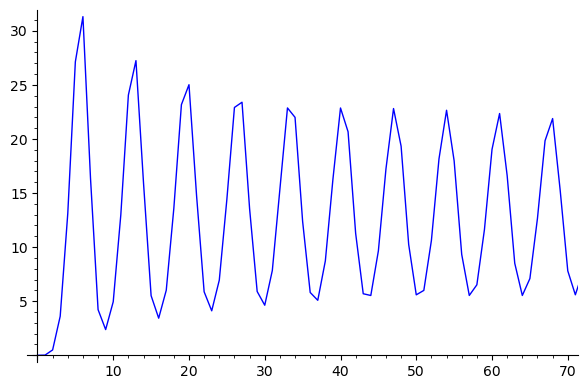

In [9]:
#5
list_plot(breathing_rate,plotjoined=true,xmax=70)

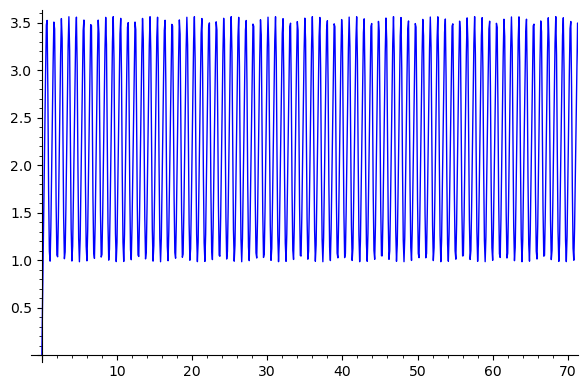

In [10]:
#6
var("X,X_t")
L=6
vmax=80
a=0.2
n=5
h=400
r=0.3
sol=dde_solve(L-(Vmax*(X_t^n)/(h+(X_t^n)))*a*X,X,{X_t:0.3},history=0,tmax=100,timestep=0.1)
times=srange(0,100,0.1)
list_plot(list(zip(times,sol)),xmax=70,plotjoined=true)

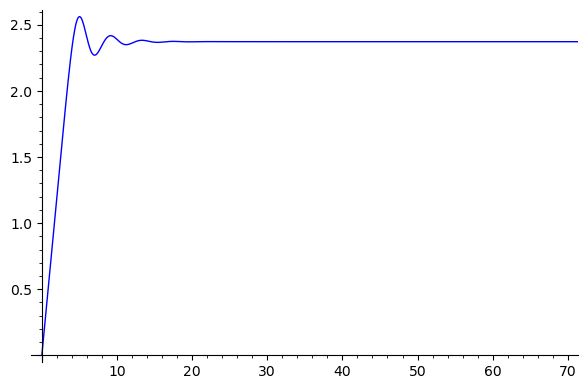

In [11]:
var("X,X_t")
L=6
Vmax=80
a=0.2
n=5
h=400
r=0.1
sol=dde_solve(L-(Vmax*(X_t^n)/(h+(X_t^n)))*a*X,X,{X_t:0.1},history=0,tmax=100,timestep=0.01)
times=srange(0,100,0.1)
list_plot(list(zip(times,sol)),xmax=70,plotjoined=true)

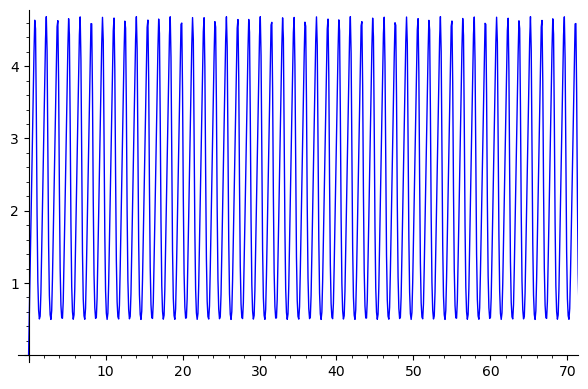

In [12]:
var("X,X_t")
L=6
vmax=80
a=0.2
n=5
h=400
r=0.5
sol=dde_solve(L-(Vmax*(X_t^n)/(h+(X_t^n)))*a*X,X,{X_t:0.5},history=0,tmax=100,timestep=0.1)
times=srange(0,100,0.1)
list_plot(list(zip(times,sol)),xmax=70,plotjoined=true)

In [13]:
#7 r=0.2 is the minimum delay needed for consistent oscillations 
@interact
def mackey(r=(0.1,15,0.01)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.2},history=0,tmax=100,timestep=0.1)
    p=list_plot(sol1,xmax=100,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e639ad040> with 1 widget
  r: FloatSlider(value=7.55, descriptio…

In [14]:
#8 "n" determines the steepness of the sigmoid because it is the exponent that the variables are raised to 

In [16]:
#9
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.2},history=0,tmax=100,timestep=0.1)
    p=list_plot(sol1,xmax=100,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e6397a8b0> with 1 widget
  r: FloatSlider(value=8.0, description…

In [17]:
#10 I set r to the previous minimum value, and found that a in order for persistent oscillations to occur, the sensitivity must be at least 5.20

In [18]:
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.1},history=0,tmax=100,timestep=0.08)
    p=list_plot(sol1,xmax=150,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e639adb80> with 1 widget
  r: FloatSlider(value=8.0, description…

In [19]:
#11
@interact
def mackey(n=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.1},history=0,tmax=100,timestep=0.08)
    p=list_plot(sol1,xmax=150,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e63789e50> with 1 widget
  n: FloatSlider(value=8.0, description…

In [20]:
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.4},history=0,tmax=100,timestep=0.1)
    p=list_plot(sol1,xmax=150,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e6373f310> with 1 widget
  r: FloatSlider(value=8.0, description…

In [21]:
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.5},history=0,tmax=100,timestep=0.1)
    p=list_plot(sol1,xmax=100,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e63679a60> with 1 widget
  r: FloatSlider(value=8.0, description…

In [22]:
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.05},history=0,tmax=100,timestep=0.04)
    p=list_plot(sol1,xmax=100,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e63cf2ee0> with 1 widget
  r: FloatSlider(value=8.0, description…

In [23]:
@interact
def mackey(r=(1,15,0.1)):
    x_prime=L-(Vmax*(x_t^n)/(h+(x_t^n)))*a*x
    sol1=dde_solve(x_prime,x,{x_t:0.7},history=0,tmax=100,timestep=0.1)
    p=list_plot(sol1,xmax=100,plotjoined=true)
    show(p)

Interactive function <function mackey at 0x7f4e6373f5e0> with 1 widget
  r: FloatSlider(value=8.0, description…

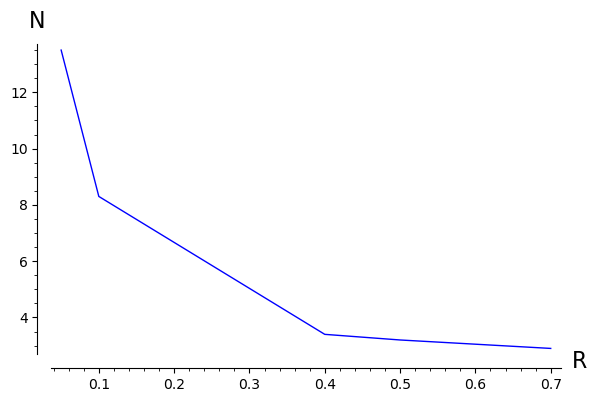

In [24]:
#When the value of r incresaes, the minimum value of n needed to create oscillations decreases. 
n_r=[(0.05,13.5),(0.1,8.3),(0.4,3.4),(0.5,3.2),(0.7,2.9)]
list_plot(n_r,axes_labels=["R","N"],plotjoined=true)